In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import scipy.stats as stats

In [547]:
os.getcwd()
os.chdir('C:\\Users\Zinia Gaba\Desktop\Great Learning Data Science\Python All Files')

In [548]:
df= pd.read_csv('mifem.csv')

In [549]:
df.head()

,Unnamed: 0,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,0,live,63,85,n,x,n,y,y,n,n
1,1,live,55,85,n,c,n,y,y,n,n
2,2,live,68,85,y,nk,nk,y,y,y,n
3,3,live,64,85,n,x,n,y,n,y,n
4,4,dead,67,85,n,nk,nk,nk,y,nk,nk


In [550]:
df.drop('Unnamed: 0', axis= 1, inplace = True)

In [551]:
df.describe(include= 'all')

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
count,1295,1295.000000,1295.000000,1295,1295,1295,1295,1295,1295,1295
unique,2,NaN,NaN,3,4,3,3,2,3,3
top,live,NaN,NaN,n,n,n,y,n,n,n
freq,974,NaN,NaN,928,522,978,813,655,724,1063
mean,NaN,60.922008,88.785328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.042327,2.553647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,35.000000,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,57.000000,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,63.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,66.000000,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [552]:
df['highbp'].value_counts()

y     813
n     406
nk     76
Name: highbp, dtype: int64

In [553]:
df.head()
z = df.columns
for i in z:
    print( df[i].value_counts())

live    974
dead    321
Name: outcome, dtype: int64
69    111
66    101
68     96
67     94
65     93
64     91
63     84
62     73
61     72
59     59
60     51
57     45
55     41
58     37
56     32
52     28
53     25
51     21
54     19
50     14
49     13
48     13
45     12
47     11
46     11
43     10
44     10
38      6
41      5
39      5
42      4
40      3
35      3
36      2
Name: age, dtype: int64
87    176
89    160
85    153
86    150
90    145
93    141
88    140
91    123
92    107
Name: yronset, dtype: int64
n     928
y     311
nk     56
Name: premi, dtype: int64
n     522
c     390
x     280
nk    103
Name: smstat, dtype: int64
n     978
y     248
nk     69
Name: diabetes, dtype: int64
y     813
n     406
nk     76
Name: highbp, dtype: int64
n    655
y    640
Name: hichol, dtype: int64
n     724
y     472
nk     99
Name: angina, dtype: int64
n     1063
y      153
nk      79
Name: stroke, dtype: int64


In [554]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outcome   1295 non-null   object
 1   age       1295 non-null   int64 
 2   yronset   1295 non-null   int64 
 3   premi     1295 non-null   object
 4   smstat    1295 non-null   object
 5   diabetes  1295 non-null   object
 6   highbp    1295 non-null   object
 7   hichol    1295 non-null   object
 8   angina    1295 non-null   object
 9   stroke    1295 non-null   object
dtypes: int64(2), object(8)
memory usage: 101.3+ KB


,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,live,63,85,n,x,n,y,y,n,n
1,live,55,85,n,c,n,y,y,n,n
2,live,68,85,y,nk,nk,y,y,y,n
3,live,64,85,n,x,n,y,n,y,n
4,dead,67,85,n,nk,nk,nk,y,nk,nk
...,...,...,...,...,...,...,...,...,...,...
1290,live,69,93,n,x,n,y,y,n,y
1291,live,54,93,n,n,n,y,y,n,n
1292,live,64,93,n,n,n,y,y,n,n
1293,live,36,93,n,c,n,n,y,n,n


In [555]:
b= df[['diabetes', 'highbp' , 'angina', 'stroke' , 'smstat' , 'premi']]

In [556]:
for i in b :
    df.drop (df[df[i] == 'nk'].index, inplace = True)
    

In [557]:
for i in b :
    print( df[i].value_counts())

n    900
y    224
Name: diabetes, dtype: int64
y    735
n    389
Name: highbp, dtype: int64
n    692
y    432
Name: angina, dtype: int64
n    990
y    134
Name: stroke, dtype: int64
n    496
c    367
x    261
Name: smstat, dtype: int64
n    849
y    275
Name: premi, dtype: int64


In [559]:
for i in df.columns:
        df[i]= pd.Categorical(df[i]).codes

In [560]:
df['yronset']=pd.Categorical(df['yronset']).codes

In [561]:
df.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,1,27,0,0,2,0,1,1,0,0
1,1,19,0,0,0,0,1,1,0,0
3,1,28,0,0,2,0,1,0,1,0
6,1,27,0,0,1,0,1,0,0,0
7,0,32,0,1,1,0,1,1,1,1


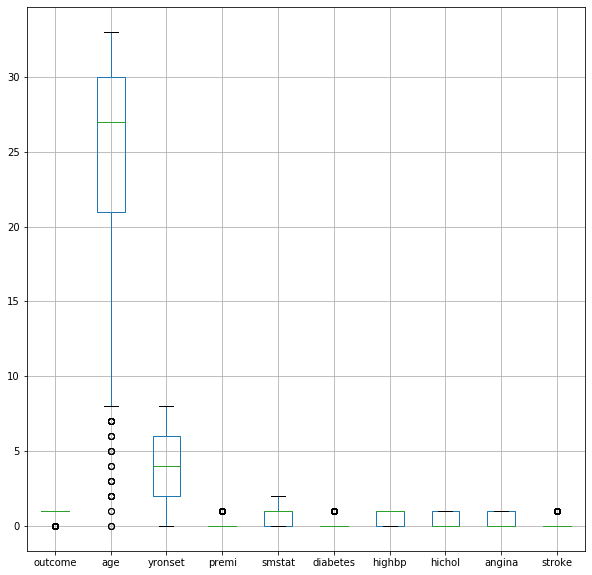

In [562]:
df.boxplot(figsize=(10,10))

In [563]:
df

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,1,27,0,0,2,0,1,1,0,0
1,1,19,0,0,0,0,1,1,0,0
3,1,28,0,0,2,0,1,0,1,0
6,1,27,0,0,1,0,1,0,0,0
7,0,32,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1290,1,33,8,0,2,0,1,1,0,1
1291,1,18,8,0,1,0,1,1,0,0
1292,1,28,8,0,1,0,1,1,0,0
1293,1,1,8,0,0,0,0,1,0,0


In [564]:
df.shape
df.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,1,27,0,0,2,0,1,1,0,0
1,1,19,0,0,0,0,1,1,0,0
3,1,28,0,0,2,0,1,0,1,0
6,1,27,0,0,1,0,1,0,0,0
7,0,32,0,1,1,0,1,1,1,1


In [565]:
df['outcome'].value_counts()

1    915
0    209
Name: outcome, dtype: int64

In [566]:
df.loc[df['outcome']==1 , 'outcome'] = 2

In [567]:
df.loc[df['outcome']==0 ,'outcome'] = 1

In [568]:
df.loc[df['outcome']==2 , 'outcome'] = 0

In [569]:
df['outcome'].value_counts()

0    915
1    209
Name: outcome, dtype: int64

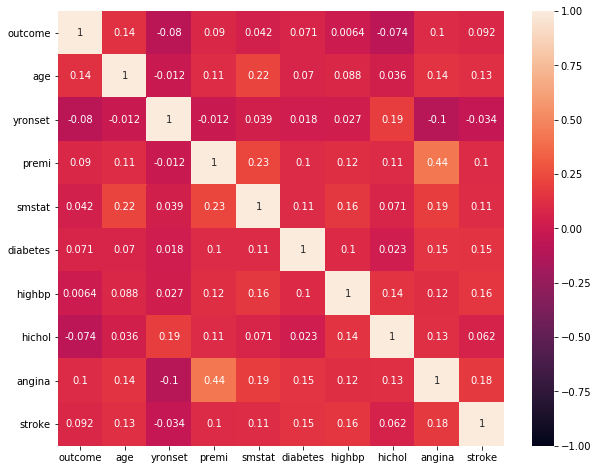

In [570]:
corr = df.corr()
corr
plt.figure(figsize= (10,8))
sns.heatmap(corr, annot = True, vmin = -1 , vmax = 1)


In [571]:
train , test = train_test_split(df, test_size = 0.30)

In [572]:
train.shape


(786, 10)

In [573]:
df.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,0,27,0,0,2,0,1,1,0,0
1,0,19,0,0,0,0,1,1,0,0
3,0,28,0,0,2,0,1,0,1,0
6,0,27,0,0,1,0,1,0,0,0
7,1,32,0,1,1,0,1,1,1,1


In [574]:
X_train= train.drop('outcome', axis=1)

In [575]:
X_test = test.drop('outcome', axis =1)

In [576]:
y_train = train['outcome']
y_test = test['outcome']

In [577]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, max_features = 4 , max_leaf_nodes = 50,min_samples_leaf = 3, min_samples_split = 10, random_state = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [579]:
#train score
print (model.score(X_train, y_train))
train_pred=model.predict(X_train)

0.8384223918575063


In [580]:
print ( classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       639
           1       0.71      0.23      0.35       147

    accuracy                           0.84       786
   macro avg       0.78      0.60      0.63       786
weighted avg       0.82      0.84      0.80       786



In [581]:
print (classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       276
           1       0.38      0.15      0.21        62

    accuracy                           0.80       338
   macro avg       0.60      0.55      0.55       338
weighted avg       0.75      0.80      0.76       338



In [582]:
z=confusion_matrix(y_train, train_pred)
z

array([[625,  14],
       [113,  34]], dtype=int64)

In [583]:
z1 =confusion_matrix(y_test, pred)
z1

array([[261,  15],
       [ 53,   9]], dtype=int64)

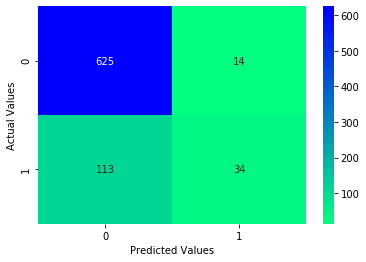

In [584]:
sns.heatmap(z, annot = True, cmap= "winter_r", fmt='.3g', linecolor='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

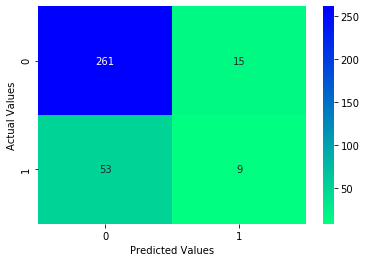

In [585]:
sns.heatmap(z1, annot = True, cmap= "winter_r", fmt='.3g', linecolor='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [586]:
from sklearn.metrics import roc_auc_score, roc_curve


In [587]:
print ( classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       639
           1       0.71      0.23      0.35       147

    accuracy                           0.84       786
   macro avg       0.78      0.60      0.63       786
weighted avg       0.82      0.84      0.80       786



In [588]:
print ( classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       276
           1       0.38      0.15      0.21        62

    accuracy                           0.80       338
   macro avg       0.60      0.55      0.55       338
weighted avg       0.75      0.80      0.76       338



In [635]:
model.score(X_test, y_test)


0.7988165680473372

In [591]:
z1

array([[261,  15],
       [ 53,   9]], dtype=int64)

0.7996710421257706

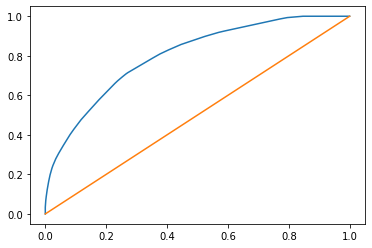

In [592]:
train_prob=model.predict_proba(X_train)
train_prob=pd.DataFrame(train_prob)[1]
fpr , tpr,_ =roc_curve(y_train , train_prob)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1))
roc_auc_score(y_train , train_prob)

0.5791841982234689

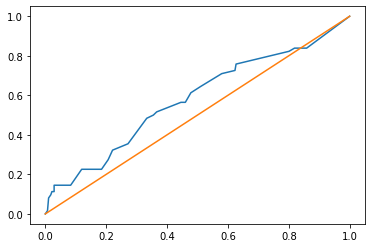

In [593]:
test_prob=model.predict_proba(X_test)
test_prob=pd.DataFrame(test_prob)[1]
fpr , tpr,_ =roc_curve(y_test , test_prob)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1))
roc_auc_score(y_test , test_prob)

In [594]:
feature_importance1=model.feature_importances_
feature_importance1=pd.DataFrame(feature_importance1 ,X_train.columns)
feature_importance1['Importance']= feature_importance1[0]
feature_importance1[0]

age         0.404845
yronset     0.138196
premi       0.026824
smstat      0.157665
diabetes    0.024321
highbp      0.055877
hichol      0.085866
angina      0.038449
stroke      0.067957
Name: 0, dtype: float64

## Random Forest


In [595]:
from sklearn.ensemble import RandomForestClassifier

In [596]:
model1 = RandomForestClassifier(n_estimators = 20 , max_features = 8, max_samples = 50,  random_state = 1 )
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

In [597]:
model1.score(X_train, y_train)

0.8078880407124682

In [598]:
#train score
train_pred = model1.predict(X_train)

In [599]:
z3= confusion_matrix(y_train, train_pred)
z3


array([[633,   6],
       [145,   2]], dtype=int64)

In [600]:
z4 = confusion_matrix(y_test, pred1)
z4


array([[269,   7],
       [ 59,   3]], dtype=int64)

In [601]:
print (classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       639
           1       0.25      0.01      0.03       147

    accuracy                           0.81       786
   macro avg       0.53      0.50      0.46       786
weighted avg       0.71      0.81      0.73       786



In [602]:
print (classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       276
           1       0.30      0.05      0.08        62

    accuracy                           0.80       338
   macro avg       0.56      0.51      0.49       338
weighted avg       0.72      0.80      0.74       338



In [603]:
model1.score(X_test, y_test)

0.8047337278106509

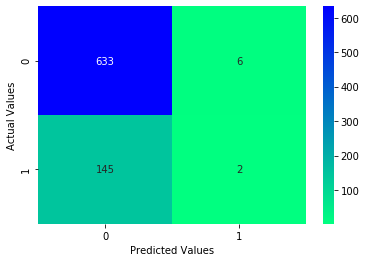

In [604]:
sns.heatmap(z3, annot = True, cmap= "winter_r", fmt='.3g', linecolor='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

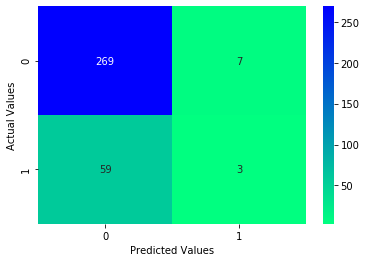

In [605]:
sns.heatmap(z4, annot = True, cmap= "winter_r", fmt='.3g', linecolor='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [606]:
print ( classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       276
           1       0.30      0.05      0.08        62

    accuracy                           0.80       338
   macro avg       0.56      0.51      0.49       338
weighted avg       0.72      0.80      0.74       338



0.6739165149627926

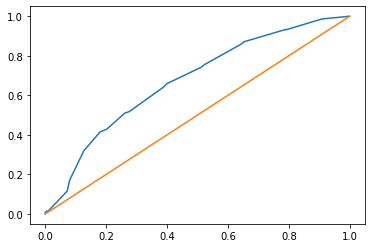

In [607]:
train_prob=model1.predict_proba(X_train)
train_prob=pd.DataFrame(train_prob)[1]
fpr , tpr,_ =roc_curve(y_train , train_prob)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1))
roc_auc_score(y_train , train_prob)

0.6421517064048621

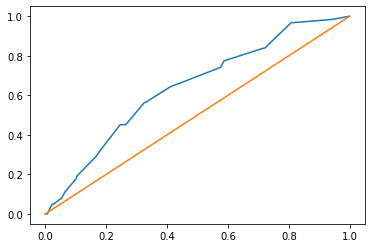

In [608]:
test_prob1=model1.predict_proba(X_test)
test_prob1=pd.DataFrame(test_prob1)[1]
fpr1 , tpr1,_ =roc_curve(y_test , test_prob1)
plt.plot(fpr1, tpr1)
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1))
roc_auc_score(y_test , test_prob1)

In [609]:
model1.score(X_test, y_test)
# RF score

0.8047337278106509

In [610]:
fi1=model1.feature_importances_
pd.DataFrame(fi1 , X_train.columns)[0]

age         0.287699
yronset     0.277685
premi       0.051165
smstat      0.088912
diabetes    0.049316
highbp      0.051003
hichol      0.066027
angina      0.060309
stroke      0.067885
Name: 0, dtype: float64

## ANN

In [611]:
X_train_s=stats.zscore(X_train)

In [612]:
X_test_s = stats.zscore(X_test)


In [613]:
X_train_s=pd.DataFrame(X_train_s , columns = X_train.columns)

In [614]:
X_test_s = pd.DataFrame(X_test_s , columns = X_test.columns)

In [615]:
X_train_s

,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,0.196188,-1.124335,1.758906,1.466329,-0.485643,-1.333186,1.099029,-0.785674,-0.345916
1,0.053934,0.455866,-0.568535,0.121481,-0.485643,0.750083,-0.909894,-0.785674,-0.345916
2,0.338443,1.641017,1.758906,1.466329,-0.485643,0.750083,1.099029,1.272792,-0.345916
3,1.191970,-0.334235,-0.568535,0.121481,-0.485643,0.750083,1.099029,-0.785674,-0.345916
4,-0.230575,1.641017,1.758906,1.466329,2.059126,0.750083,1.099029,1.272792,2.890872
...,...,...,...,...,...,...,...,...,...
781,-0.088321,-0.729285,-0.568535,-1.223367,-0.485643,0.750083,1.099029,1.272792,-0.345916
782,0.907461,-0.729285,-0.568535,1.466329,2.059126,0.750083,-0.909894,1.272792,-0.345916
783,0.196188,-0.334235,-0.568535,-1.223367,-0.485643,-1.333186,-0.909894,-0.785674,-0.345916
784,-0.799593,0.850916,-0.568535,-1.223367,-0.485643,-1.333186,-0.909894,-0.785674,-0.345916


In [616]:
model2 =MLPClassifier(tol = 0.00001 , max_iter = 100 , random_state = 1)

In [617]:
model2.fit(X_train_s, y_train)

MLPClassifier(max_iter=100, random_state=1, tol=1e-05)

In [618]:
pred3=model2.predict(X_test_s)

In [619]:
model2.score(X_train_s , y_train)

0.8142493638676844

In [620]:
print (classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       276
           1       1.00      0.02      0.03        62

    accuracy                           0.82       338
   macro avg       0.91      0.51      0.47       338
weighted avg       0.85      0.82      0.74       338



In [625]:
train_prob = model2.predict(X_train_s)

In [626]:
print (classification_report(y_train, train_prob))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       639
           1       0.67      0.01      0.03       147

    accuracy                           0.81       786
   macro avg       0.74      0.51      0.46       786
weighted avg       0.79      0.81      0.73       786



In [627]:
model2.score(X_test_s, y_test)

0.8195266272189349

In [628]:
z6 = confusion_matrix(y_train, train_prob)

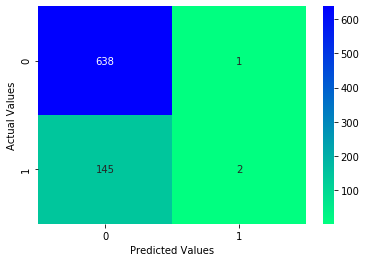

In [629]:
sns.heatmap(z6, annot = True, cmap= "winter_r", fmt='.3g', linecolor='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

0.7416562869279167

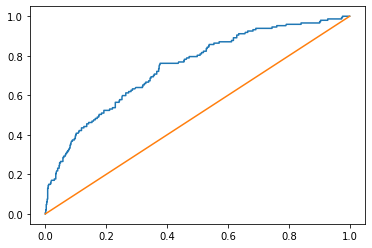

In [630]:
train_prob2=model2.predict_proba(X_train_s)
train_prob2=pd.DataFrame(train_prob2)[1]
fpr , tpr,_ =roc_curve(y_train , train_prob2)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1))
roc_auc_score(y_train , train_prob2)

In [631]:
z7 = confusion_matrix(y_test, pred3)

In [632]:
z7

array([[276,   0],
       [ 61,   1]], dtype=int64)

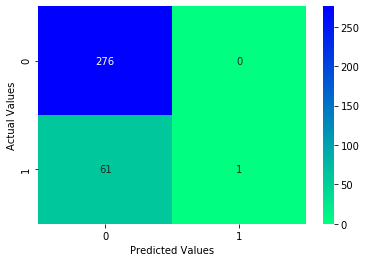

In [633]:
sns.heatmap(z7, annot = True, cmap= "winter_r", fmt='.3g', linecolor='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

0.6776531089294062

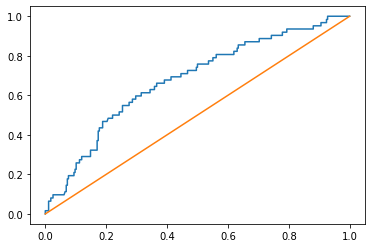

In [634]:
test_prob2=model2.predict_proba(X_test_s)
test_prob2=pd.DataFrame(test_prob2)[1]
fpr2 , tpr2,_ =roc_curve(y_test , test_prob2)
plt.plot(fpr2, tpr2)
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1))
roc_auc_score(y_test , test_prob2)

## Chosen model - CART

In [ ]:
model

In [ ]:
feature_importance1

In [ ]:
feature_importance1=feature_importance1['Importance']

In [ ]:
feature_importance1

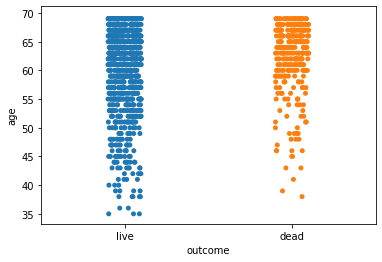

In [515]:
sns.stripplot( df['outcome'], df['age'])

In [ ]:
sns.set_style('dark')

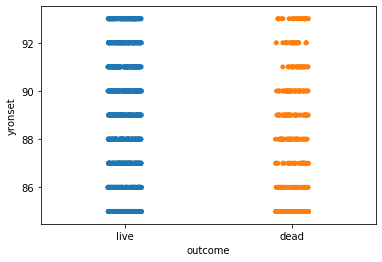

In [516]:
sns.stripplot(df['outcome'] , df['yronset'])

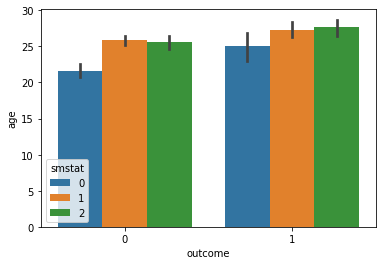

In [657]:
sns.barplot(df['outcome'], df['age'] ,  hue = df['smstat'])